In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


In [2]:
link = 'https://drive.google.com/open?id=1womfzt0XeHfJZIBAUOOLL1-uY_YiOtoI' # Paste the shareable link here

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') # file will be stored as train.csv in the colab directory

1womfzt0XeHfJZIBAUOOLL1-uY_YiOtoI


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
train = pd.read_csv('train.csv')

In [81]:
train.shape

(100000, 100)

In [6]:
train.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,...,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,...,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,...,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,...,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,...,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,...,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [7]:
train.dtypes.value_counts()

float64    69
object     21
int64      10
dtype: int64

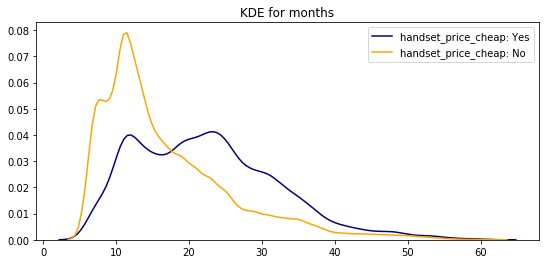

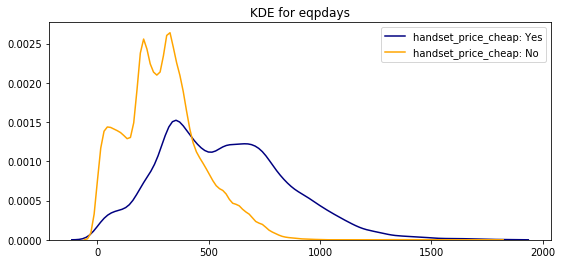

In [88]:
def kdeplot2(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(train2[train2['handset_price_cheap'] == True][feature].dropna(), color= 'navy', label= 'handset_price_cheap: Yes')
    ax1 = sns.kdeplot(train2[train2['handset_price_cheap'] == False][feature].dropna(), color= 'orange', label= 'handset_price_cheap: No')
kdeplot2('months')
kdeplot2('eqpdays')

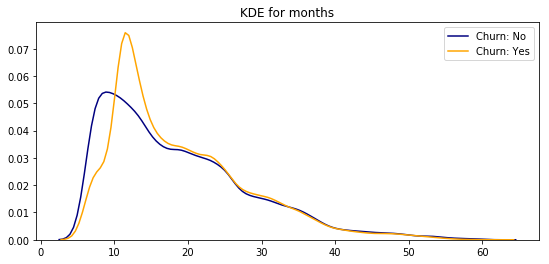

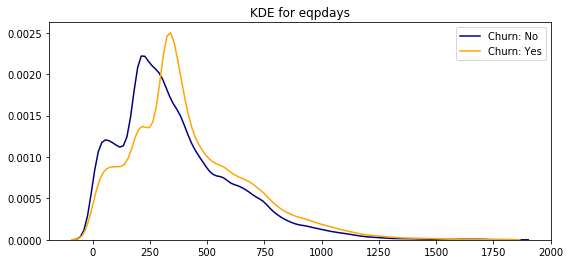

In [8]:
# most people churn at around 10 months of being in service and it coincides with eqpmnt days which strongly 
# suggests that people change phone and hence network. Good handset ties can be looked into
import seaborn as sns; 
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(train[train['churn'] == 0][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(train[train['churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('months')
kdeplot('eqpdays')

In [12]:
train2['eqpdays_to_month'] = (train2['eqpdays'] / 30).round(0)
train2['eqpdays_to_month'].head()

0    12.0
1     8.0
2    50.0
3    60.0
4    14.0
Name: eqpdays_to_month, dtype: float64

In [0]:
train2['drop_dat_rate'] = train2['drop_dat_Mean']/train2['plcd_dat_Mean']

In [43]:
train2.groupby('churn')['roam_Mean'].mean()

churn
0    1.150619
1    1.424969
Name: roam_Mean, dtype: float64

In [18]:
# High correlation between eqp days and months
train2[train2['churn'] == 1]['eqpdays_to_month'].corr(train2[train2['churn'] == 1]['months'])

0.5591906876834174

In [24]:
train2[train2['churn'] == 1].groupby('refurb_new')['eqpdays_to_month'].median()

refurb_new
N    13.0
R     9.0
Name: eqpdays_to_month, dtype: float64

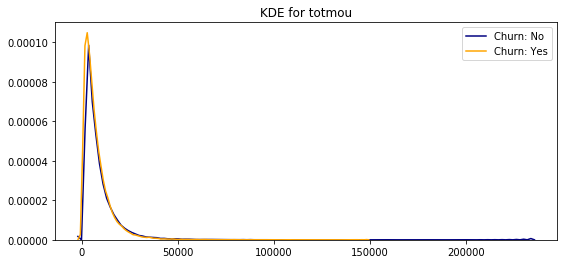

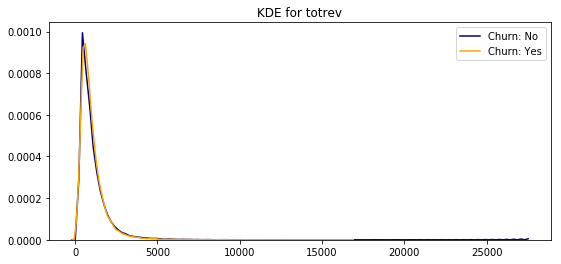

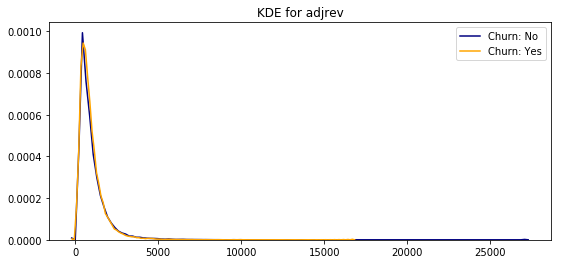

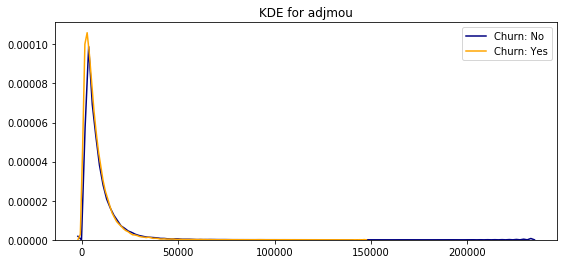

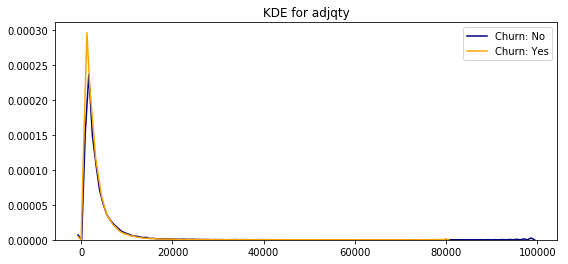

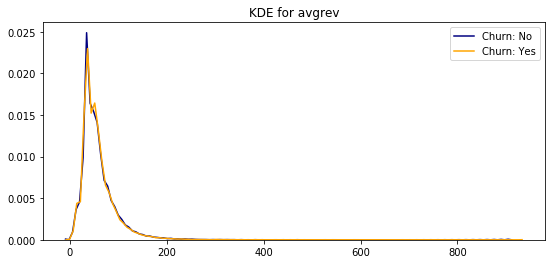

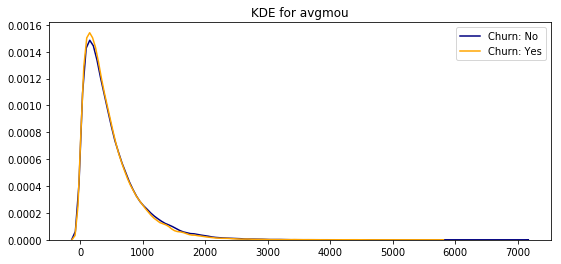

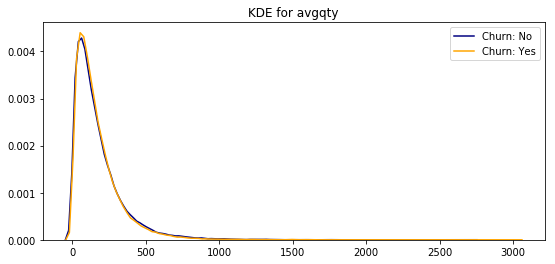

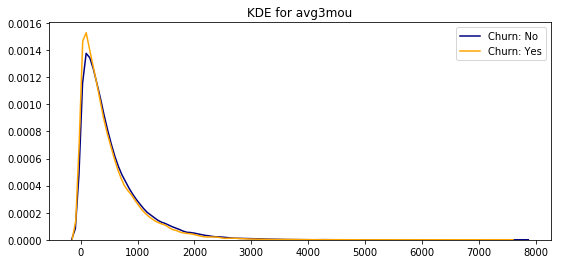

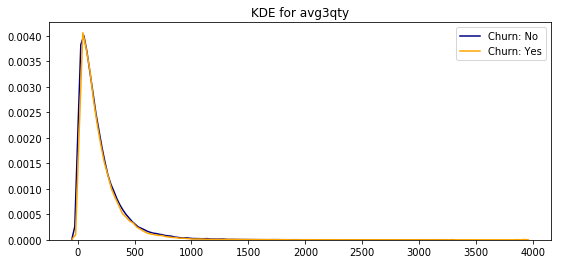

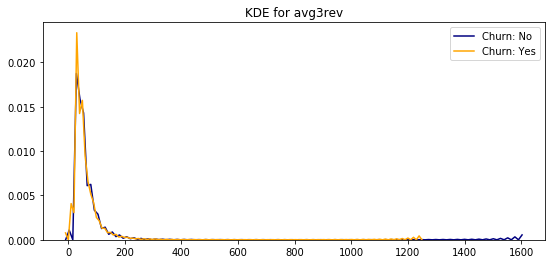

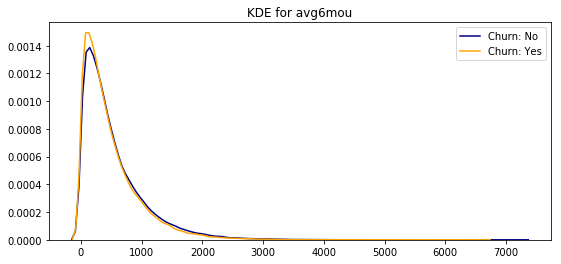

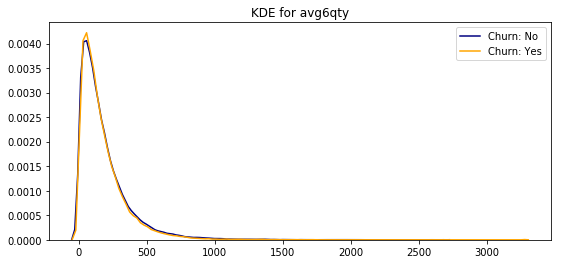

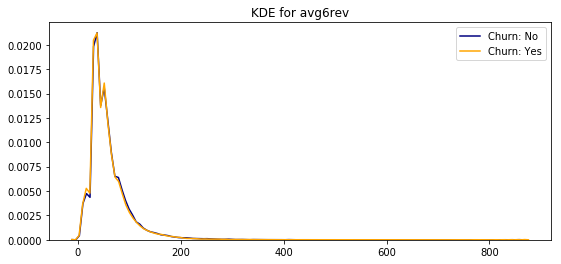

In [175]:
for i in train.iloc[:,55:70].columns:
  kdeplot(i)

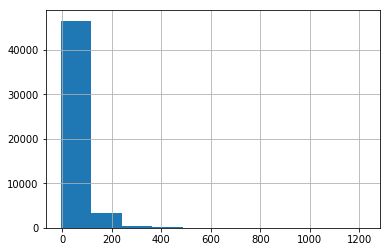

In [228]:
train2[(train['churn'] == 0)]['rev_Mean'].hist()

In [209]:
train2.groupby('churn')['mou_Mean'].median()

churn
0    380.50
1    329.75
Name: mou_Mean, dtype: float64

In [225]:
train2[train2['mou_Mean']>1500].shape

(5456, 105)

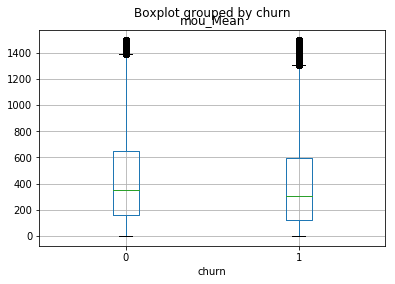

In [226]:
train2[train2['mou_Mean']<1500].boxplot(column = ['mou_Mean'], by ='churn')

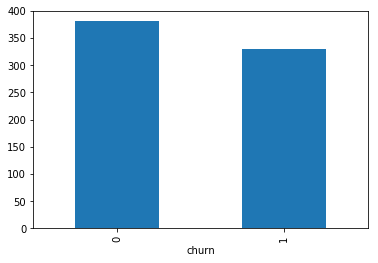

In [235]:
(train2.groupby('churn')['mou_Mean'].median()).plot(kind = 'bar')

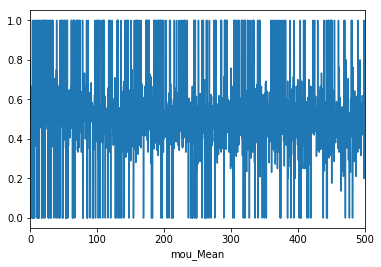

In [249]:
train2[train2['mou_Mean']<500].groupby('mou_Mean')['churn'].mean().plot(kind = 'line')

In [50]:
train2.groupby('churn')['avg3mou'].mean()

churn
0    545.850073
1    492.969109
Name: avg3mou, dtype: float64

In [53]:
train2[train2['avg3mou']>=1500].shape

(5750, 102)

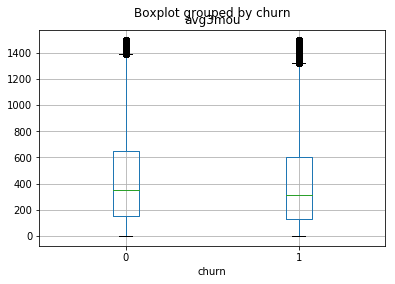

In [52]:
train2[train2['avg3mou']<1500].boxplot(column = 'avg3mou', by = 'churn')

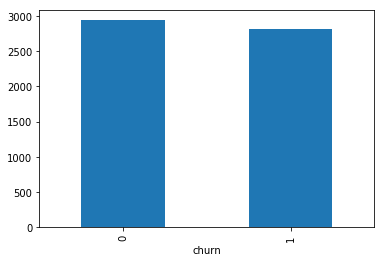

In [237]:
(train2.groupby('churn')['totcalls'].mean()).plot(kind = 'bar')

In [232]:
(train[train['churn']=='No']['rev_Mean']).describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: rev_Mean, dtype: float64

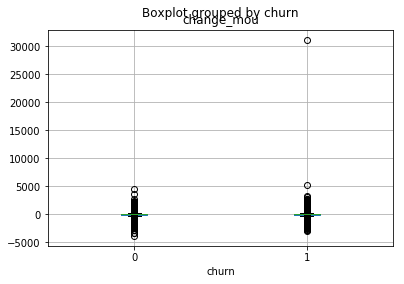

In [56]:
train2.boxplot(column = 'change_mou', by = 'churn')

In [71]:
train2[train2['change_mou']>500].shape[0]

2546

In [72]:
train2[train2['change_mou']<-500].shape[0]

3155

In [79]:
train2[(train2['change_mou']<500) & (train2['change_mou']>-500)].groupby('churn')['change_mou'].mean()

churn
0    -1.770387
1   -16.995938
Name: change_mou, dtype: float64

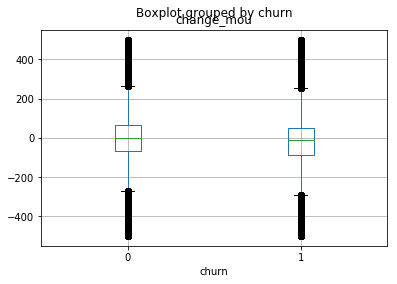

In [80]:
# Percentage change in monthly minutes of use vs previous three month average - negative so less using
train2[(train2['change_mou']<500) & (train2['change_mou']>-500)].boxplot(column = 'change_mou', by = 'churn')

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


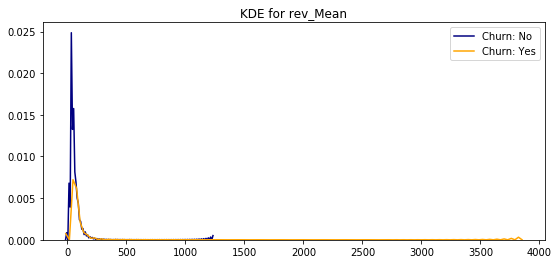

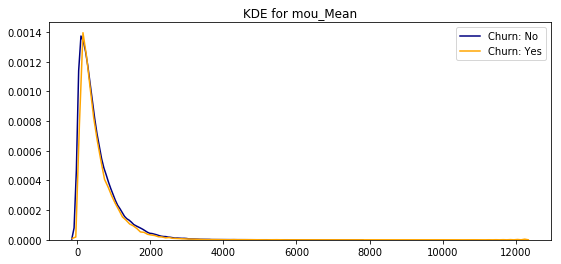

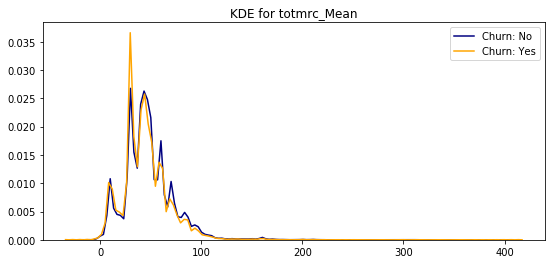

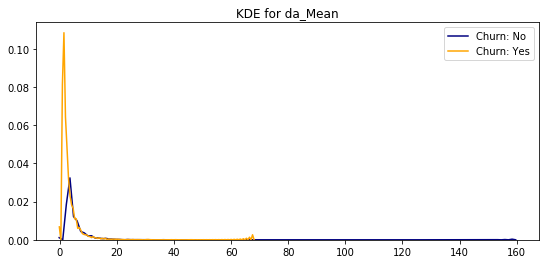

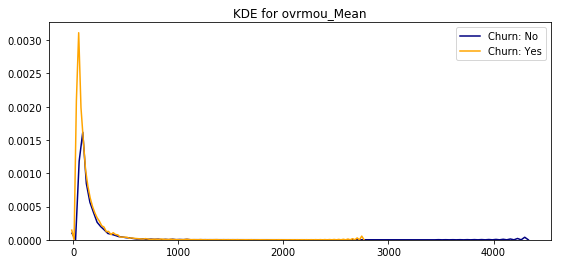

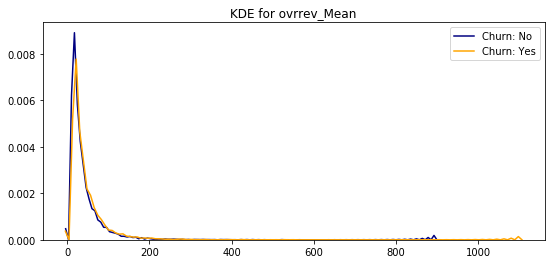

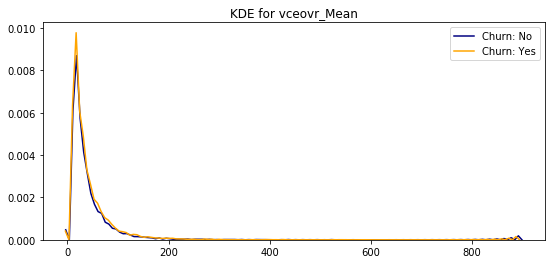

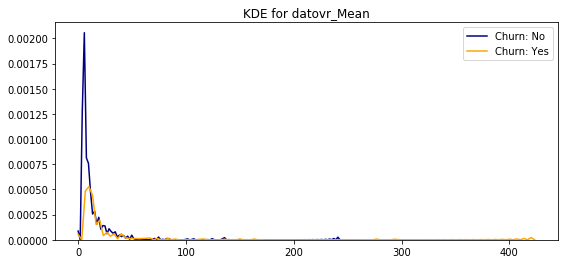

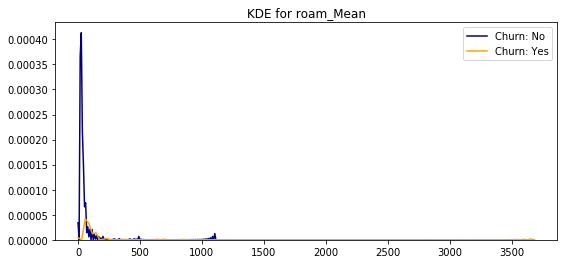

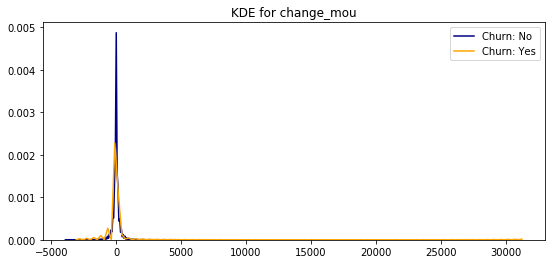

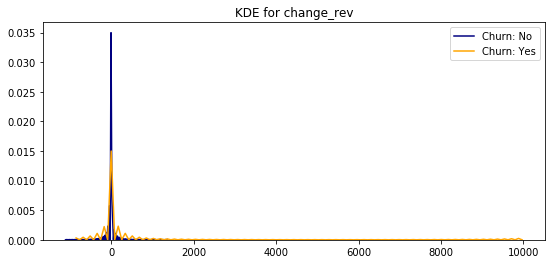

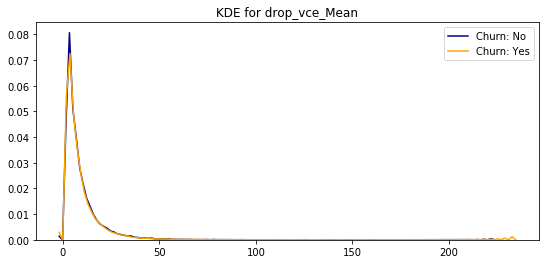

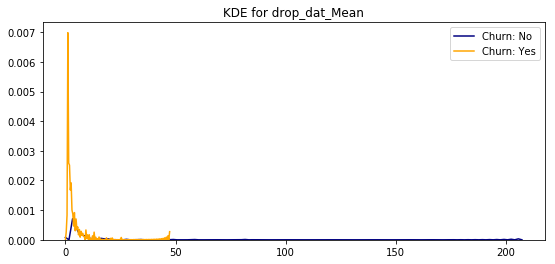

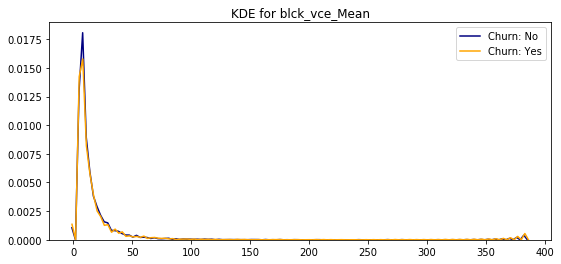

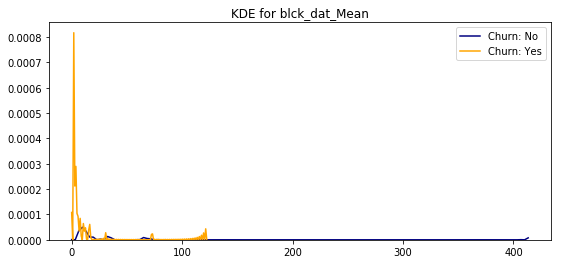

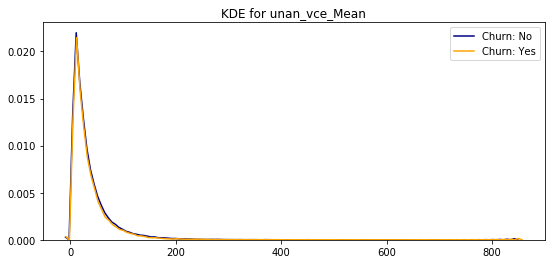

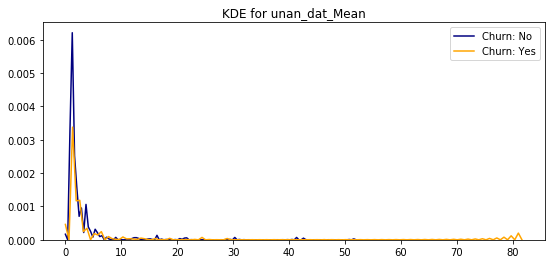

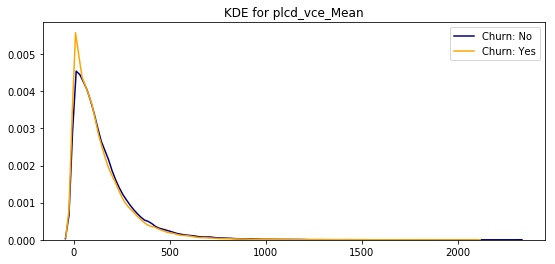

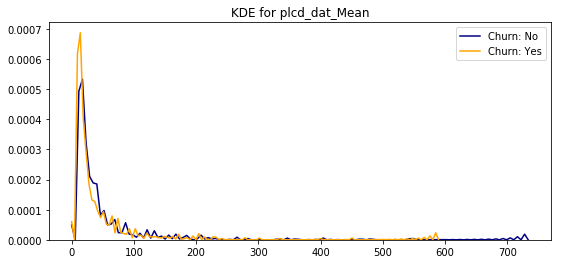

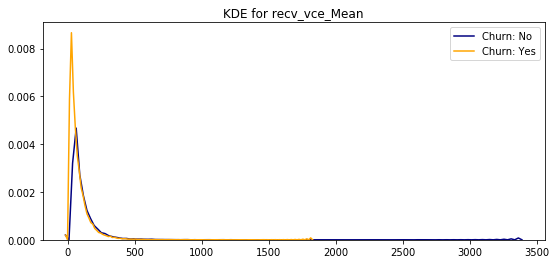

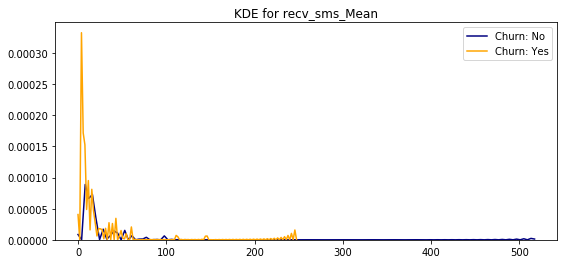

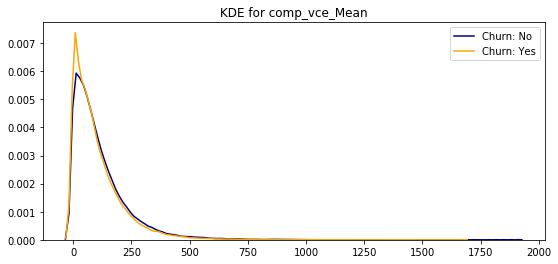

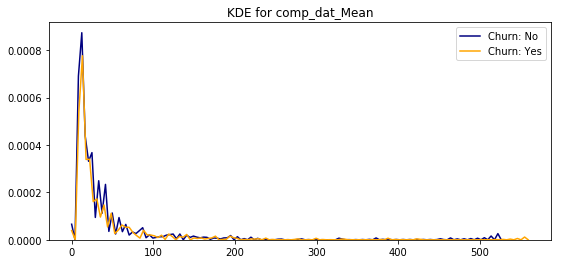

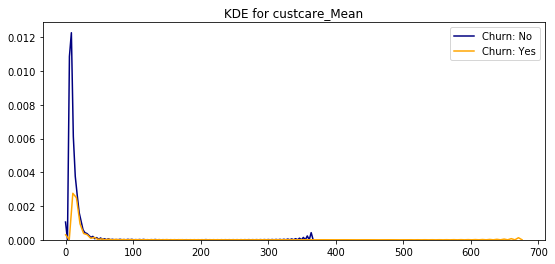

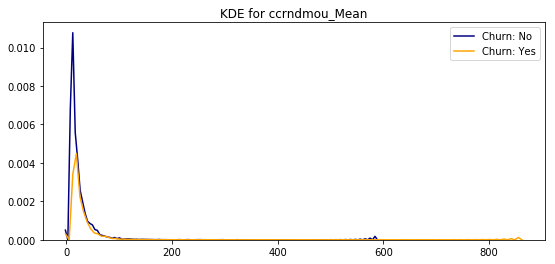

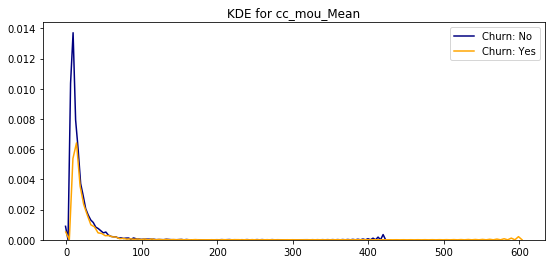

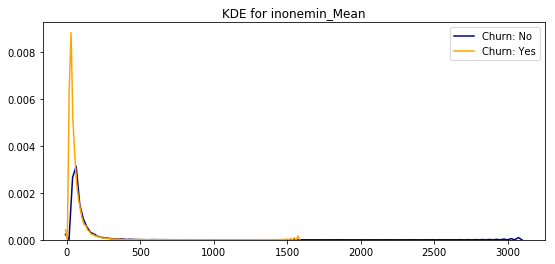

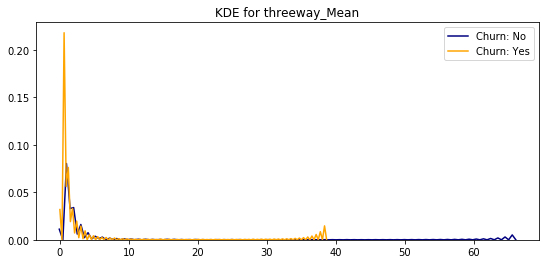

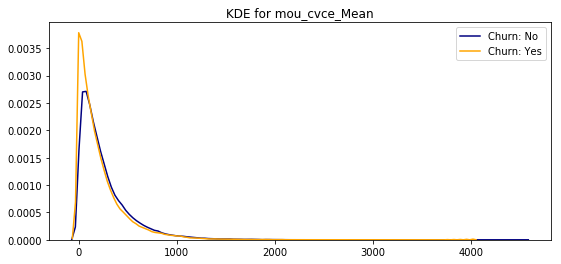

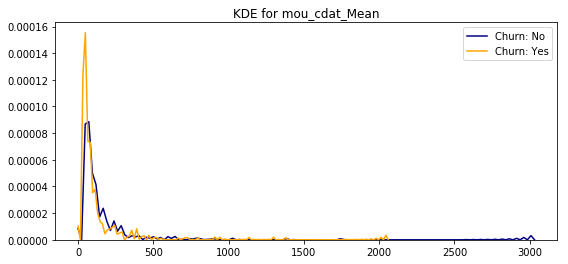

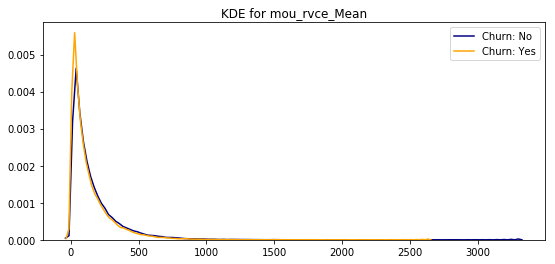

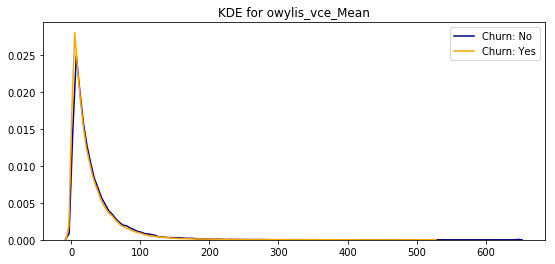

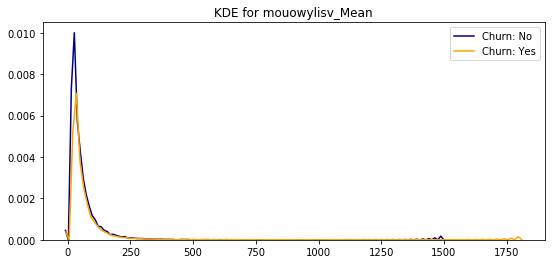

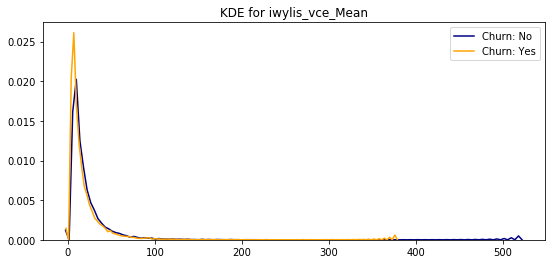

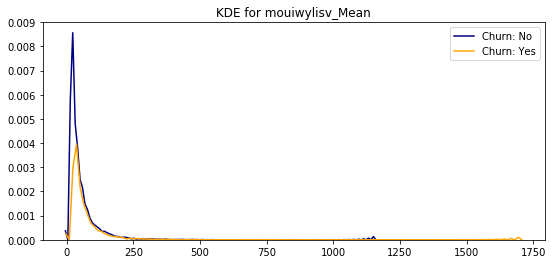

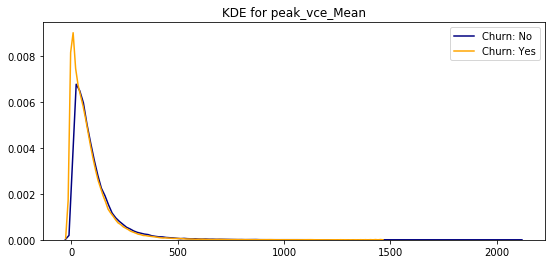

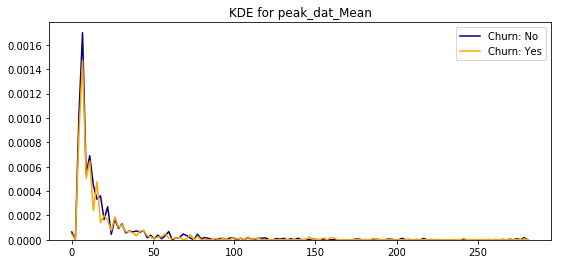

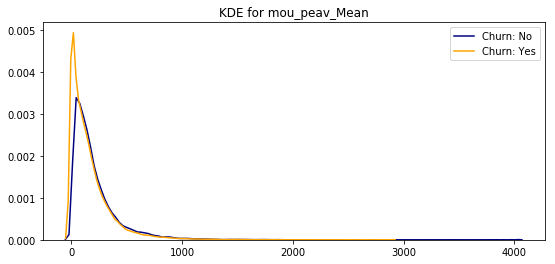

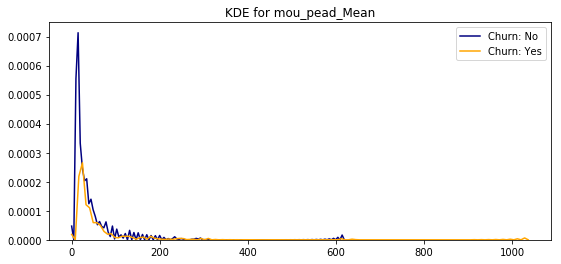

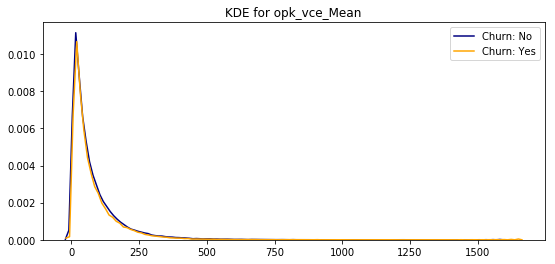

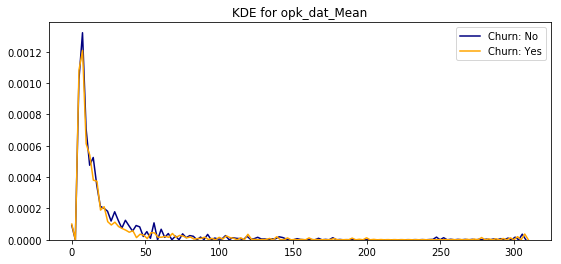

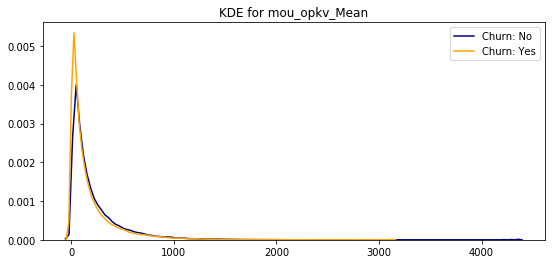

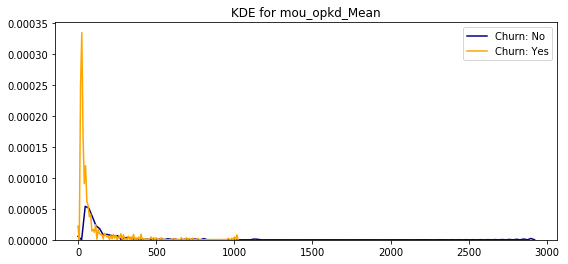

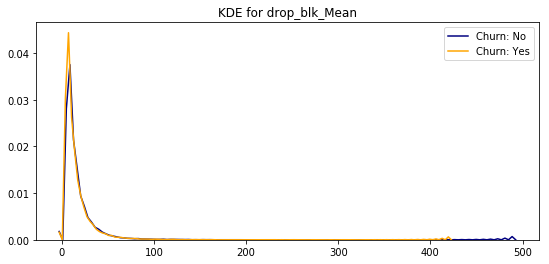

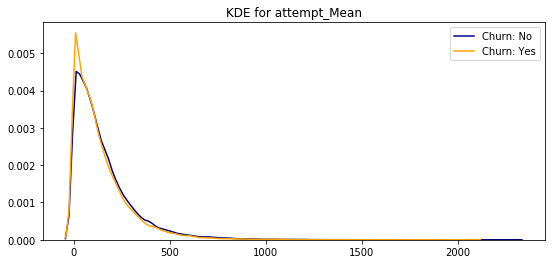

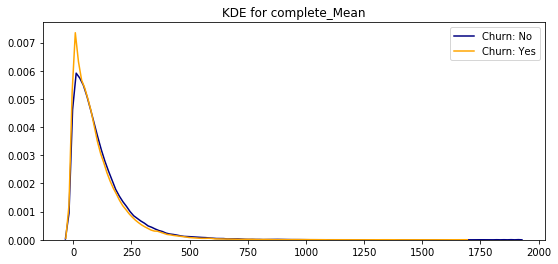

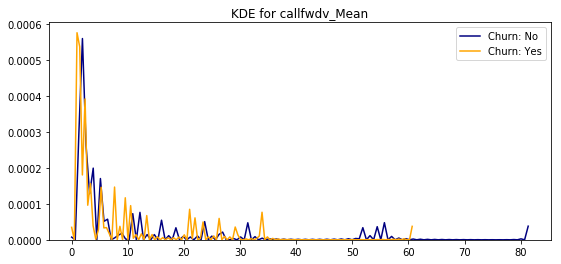

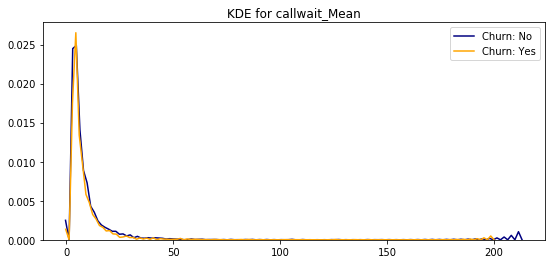

In [183]:
for i in train.iloc[:,0:48].columns:
  kdeplot(i)

In [0]:
train2 = train.copy()

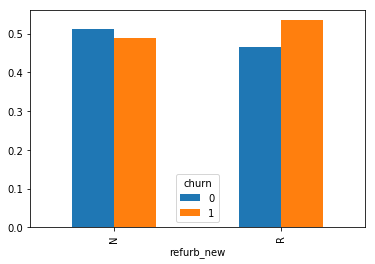

In [129]:
# churn rate is high for refurbished phone users
a = train2.groupby(['refurb_new','churn'])['Customer_ID'].count().unstack('churn')
b = (train2.groupby('refurb_new')['Customer_ID'].count())

a.loc[:,0] = a.loc[:,0]/b
a.loc[:,1] = a.loc[:,1]/b

a.plot(kind = 'bar')

In [0]:
train2['lor_old_new'] = (train2['lor'] > 2)

In [101]:
train2['lor_old_new'].value_counts()

False    51384
True     48616
Name: lor_old_new, dtype: int64

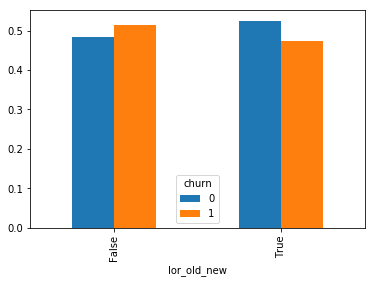

In [109]:
# People who are new to the city (less than 2 months) have high tendency to churn
a = train2.groupby(['lor_old_new','churn'])['Customer_ID'].count().unstack('churn')
b = train2.groupby('lor_old_new')['Customer_ID'].count()

a.loc[:,0] = a.loc[:,0]/b
a.loc[:,1] = a.loc[:,1]/b

a.plot(kind = 'bar')

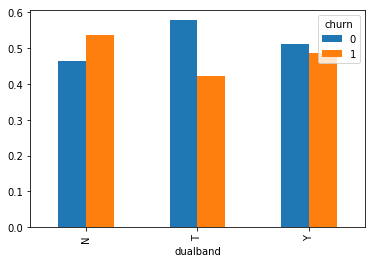

In [128]:
# Non Dual bands tend to churn out more
# N = No
# T = Tri-mode (analog, digital, 3G)
# U = Unknown
# Y = Yes

a = train2.groupby(['dualband','churn'])['Customer_ID'].count().unstack('churn')
b = train2.groupby('dualband')['Customer_ID'].count()

a.drop(['U'], inplace = True)
b.drop(['U'], inplace = True)

a.loc[:,0] = a.loc[:,0]/b
a.loc[:,1] = a.loc[:,1]/b

a.plot(kind = 'bar')

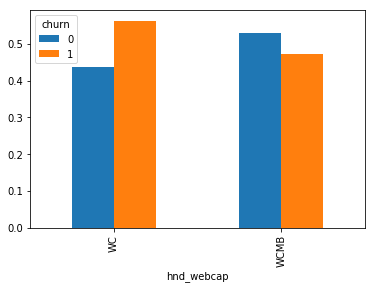

In [130]:
# Non WCMBs have higher tendency to churn

a = train2.groupby(['hnd_webcap','churn'])['Customer_ID'].count().unstack('churn')
b = train2.groupby('hnd_webcap')['Customer_ID'].count()

a.drop(['UNKW'], inplace = True)
b.drop(['UNKW'], inplace = True)

a.loc[:,0] = a.loc[:,0]/b
a.loc[:,1] = a.loc[:,1]/b

a.plot(kind = 'bar')

In [163]:
train2['models'].value_counts()

1.0     63273
2.0     25041
3.0      7822
4.0      2472
5.0       852
6.0       330
7.0       117
8.0        50
9.0        25
10.0       11
11.0        3
15.0        1
16.0        1
14.0        1
Name: models, dtype: int64

In [164]:
train2['models_more_than_one'] = (train2['models'] > 1)
train2['models_more_than_one'].value_counts()

False    63274
True     36726
Name: models_more_than_one, dtype: int64

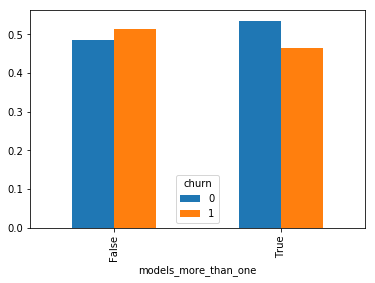

In [165]:
# more than 1 model shows loyalty of customer and hence less churn
train2.groupby('models_more_than_one')['churn'].value_counts(normalize=True).unstack('churn').plot(kind = 'bar')

In [166]:
train2['phones'].value_counts()

1.0     57277
2.0     24634
3.0      9677
4.0      4311
5.0      1940
6.0       907
7.0       526
8.0       298
9.0       153
10.0      107
11.0       60
12.0       37
13.0       21
14.0       13
16.0        9
15.0        9
19.0        6
17.0        4
18.0        3
24.0        2
22.0        2
21.0        1
20.0        1
28.0        1
Name: phones, dtype: int64

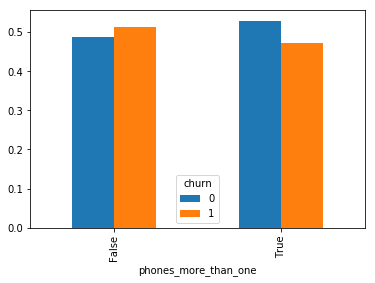

In [167]:
train2['phones_more_than_one'] = (train2['phones'] > 1)

# more than 1 phone shows loyalty of customer and hence less churn
train2.groupby('phones_more_than_one')['churn'].value_counts(normalize=True).unstack('churn').plot(kind = 'bar')

In [173]:
train2.groupby('hnd_price')['churn'].value_counts(normalize = True).unstack('churn')

churn,0,1
hnd_price,,
9.989998,0.413128,0.586872
29.989990,0.427842,0.572158
39.989990,0.426180,0.573820
59.989990,0.481302,0.518698
79.989990,0.504391,0.495609
99.989990,0.528256,0.471744
119.989990,1.000000,NaN
129.989990,0.539924,0.460076
149.989990,0.531881,0.468119


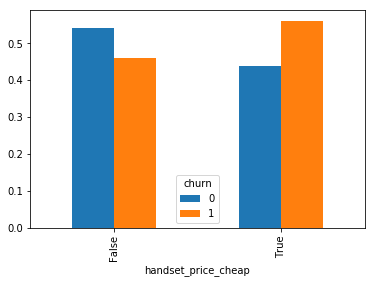

In [84]:
train2['handset_price_cheap'] = (train2['hnd_price'] < 60)

# users with cheap handsets churn out more - maybe they just grab best of offers and move on
train2.groupby('handset_price_cheap')['churn'].value_counts(normalize=True).unstack('churn').plot(kind = 'bar')

In [176]:
train2['actvsubs'].value_counts()

1     70524
2     24422
3      3776
4       899
5       262
0        81
6        20
8         6
7         5
9         3
53        1
11        1
Name: actvsubs, dtype: int64

In [0]:
#bucketing active subscribers
train2['actvsubs_more_than_one'] = (train2['actvsubs'] > 1)

In [179]:
train2['uniqsubs'].value_counts()

1      61966
2      27556
3       6579
4       2556
5        835
6        315
7        111
8         40
9         20
10         9
11         5
12         4
13         2
18         1
196        1
Name: uniqsubs, dtype: int64

In [0]:
#bucketing unique subscribers
train2['uniqsubs_more_than_one'] = (train2['uniqsubs'] > 1)

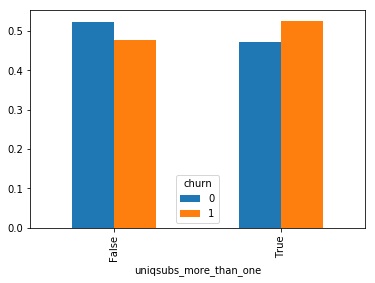

In [181]:
train2.groupby('uniqsubs_more_than_one')['churn'].value_counts(normalize=True).unstack('churn').plot(kind = 'bar')

In [0]:
train.isnull().sum().sort_values(ascending = False)

numbcars            49366
dwllsize            38308
HHstatin            37923
ownrent             33706
dwlltype            31909
lor                 30190
income              25436
adults              23019
infobase            22079
hnd_webcap          10189
prizm_social_one     7388
avg6rev              2839
avg6qty              2839
avg6mou              2839
kid16_17             1732
truck                1732
rv                   1732
ethnic               1732
forgntvl             1732
marital              1732
kid11_15             1732
kid6_10              1732
kid3_5               1732
kid0_2               1732
creditcd             1732
change_rev            891
change_mou            891
hnd_price             847
ovrrev_Mean           357
rev_Mean              357
                    ...  
avg3qty                 0
avg3mou                 0
avgqty                  0
avgmou                  0
avgrev                  0
adjqty                  0
adjmou                  0
adjrev      

In [0]:
train.shape

(100000, 100)

In [0]:
train.fillna(0, inplace = True)

In [0]:
train.isnull().any().sum()

0

In [0]:
abs(train.corr()['churn']).sort_values(ascending = False)

churn              1.000000
eqpdays            0.112705
hnd_price          0.097949
totmrc_Mean        0.070620
mou_Mean           0.058159
mou_cvce_Mean      0.052042
complete_Mean      0.051740
comp_vce_Mean      0.051574
avg3mou            0.049546
mou_opkv_Mean      0.048896
attempt_Mean       0.048533
plcd_vce_Mean      0.048321
peak_vce_Mean      0.048320
opk_vce_Mean       0.047873
mou_peav_Mean      0.047287
mou_rvce_Mean      0.047148
models             0.045047
lor                0.044119
avg3qty            0.043883
Customer_ID        0.042764
owylis_vce_Mean    0.042065
recv_vce_Mean      0.041779
iwylis_vce_Mean    0.040853
uniqsubs           0.039882
phones             0.039443
ccrndmou_Mean      0.037890
avg6mou            0.037358
custcare_Mean      0.036393
unan_vce_Mean      0.035560
cc_mou_Mean        0.035248
                     ...   
totcalls           0.015780
drop_vce_Mean      0.015261
income             0.014799
da_Mean            0.014079
avg3rev            0

In [0]:
train = pd.get_dummies(train)

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
train1, test = train_test_split(train, test_size = 0.25, random_state = 42)

In [0]:
train.dtypes.value_counts()

uint8      171
float64     69
int64       10
dtype: int64

In [0]:
train.head(2)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,...,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,ethnic_0,ethnic_B,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_0,kid0_2_U,kid0_2_Y,kid3_5_0,kid3_5_U,kid3_5_Y,kid6_10_0,kid6_10_U,kid6_10_Y,kid11_15_0,kid11_15_U,kid11_15_Y,kid16_17_0,kid16_17_U,kid16_17_Y,creditcd_0,creditcd_N,creditcd_Y
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.0,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.0,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1


(array([49634., 25397., 21350.]),
 array([  0, 100, 200, 500]),
 <a list of 3 Patch objects>)

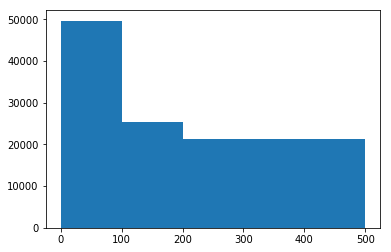

In [0]:
plt.hist(train[(train['churn']==0) & train['attempt_Mean'] < 1000]['attempt_Mean'], bins = [0, 100, 200, 500])

{'boxes': [<matplotlib.lines.Line2D at 0x7f3d0ca912e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3d0ca91ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3d0ca1c4e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3d0ca1c198>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3d0ca91438>,
  <matplotlib.lines.Line2D at 0x7f3d0ca91780>]}

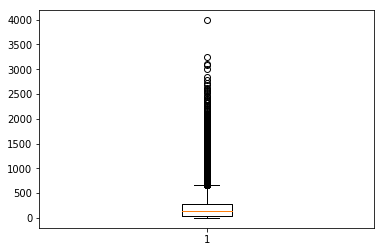

In [0]:
plt.boxplot(train[(train['churn'] == 1)]["mou_cvce_Mean"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f3d0c9f68d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3d0ca020f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3d0ca02ac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3d0ca02780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3d0c9f6a20>,
  <matplotlib.lines.Line2D at 0x7f3d0c9f6d68>]}

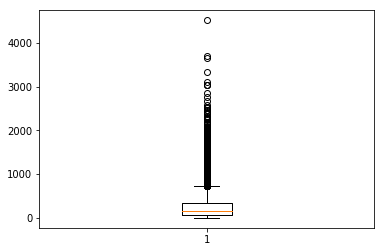

In [0]:
plt.boxplot(train[(train['churn'] == 0)]["mou_cvce_Mean"])

In [0]:
train.groupby('churn')['mou_cvce_Mean'].median()

churn
0    159.876667
1    132.706667
Name: mou_cvce_Mean, dtype: float64

In [0]:
train.groupby('churn')['ovrmou_Mean'].median()

churn
0    2.25
1    3.25
Name: ovrmou_Mean, dtype: float64

In [0]:
train.groupby('churn')['totmrc_Mean'].median()

churn
0    44.9900
1    42.5725
Name: totmrc_Mean, dtype: float64

In [0]:
train.groupby('churn')['change_mou'].median()

churn
0   -2.75
1   -8.75
Name: change_mou, dtype: float64

In [0]:
train.groupby('churn')['mou_peav_Mean'].median()

churn
0    123.201667
1    107.045000
Name: mou_peav_Mean, dtype: float64

In [0]:
train.groupby('churn')['eqpdays'].median()

churn
0    310.0
1    366.0
Name: eqpdays, dtype: float64

In [0]:
train.groupby('churn')['cc_mou_Mean'].mean()

churn
0    4.051601
1    3.308545
Name: cc_mou_Mean, dtype: float64

In [0]:
import xgboost as xgb

In [0]:
params = {
   
    'max_depth': 7, # to control over-fitting, optimal value range: 3-10
    'gamma' :0, # the minimum loss reduction required to make a split, XGB will build the tree first then prune in case of 0 gamma
    'eta':.05, # shrinkage factor, optimal value range: 0.01-0.2
    'subsample': 0.7, # fraction of observations to be randomly samples for each tree, optimal value range: 0.5-1
    'colsample_bytree': 0.7, # fraction of columns to be randomly samples for each tree, optimal value range: 0.5-1
    'objective':'binary:logistic', # loss function to be minimized
    'eval_metric':'auc', # metric to be used for validation data
    'silent': 0 # running messages will be printed
}

In [0]:
def XGBmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_test = xgb.DMatrix(X_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,
                    num_boost_round=500, # number of boosting rounds or trees to build
                    early_stopping_rounds=10, # stop if performance haven’t improved for N rounds
                    evals=[(matrix_test,'test')]
                   )
    return model

In [0]:
X = train1.loc[:,train1.columns != 'churn']

In [0]:
y = train1['churn']

In [0]:
from sklearn.model_selection import train_test_split
xgb_train, xgb_val, xgb_y_train, xgb_y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
xgb_model = XGBmodel(xgb_train,xgb_val,xgb_y_train,xgb_y_val,params)

In [0]:
y_test = test['churn']
x_test = test.loc[:,test.columns != 'churn']

In [0]:
xgb_test = xgb.DMatrix(x_test)

In [0]:
pred_xgb = xgb_model.predict(xgb_test, ntree_limit = xgb_model.best_ntree_limit).tolist()
final_xgb_pred = pd.DataFrame(pred_xgb)
final_xgb_pred.head()

In [0]:
final_xgb_pred.hist()

In [0]:
final_xgb_pred['churn_flag'] = final_xgb_pred[0]>0.5

In [0]:
final_xgb_pred.columns

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix(y_test,final_xgb_pred['churn_flag'])

In [0]:
(7881+8057)/len(y_test)

In [233]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X, y)
preds = model.predict(x_test)

NameError: ignored

In [0]:
imp_feature = dict(zip(X.columns, model.feature_importances_))

In [0]:
pd.Series(imp_feature).sort_values(ascending = False).to_frame().to_csv('imp_ft.csv')

In [0]:
# Plot features importances
imp = pd.Series(data=model.feature_importances_, index=X.columns).sort_values(ascending=False)[:25]
plt.figure(figsize=(5,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [0]:
from xgboost import plot_importance
plot_importance(model)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)